In [2]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# Import scikit learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
# Import data
data = pd.read_csv('../data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Overview of data types and completeness of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data.drop(labels=['date','view','sqft_above','sqft_basement','yr_renovated',
                  'zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [7]:
data.drop(labels='waterfront', axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


In [9]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000


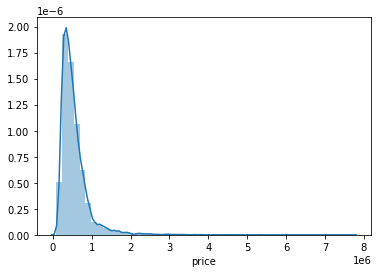

In [10]:
sns.distplot(data['price'])

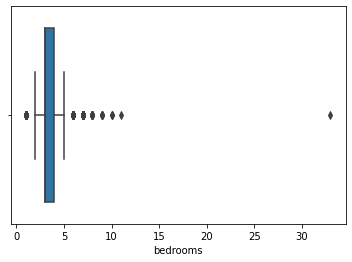

In [11]:
sns.boxplot(data['bedrooms'])
# 5 bedrooms max

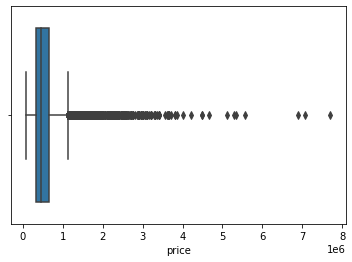

In [12]:
sns.boxplot(data['price'])
# 1.25 max

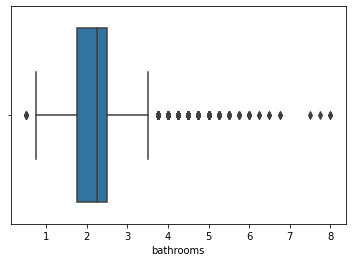

In [13]:
sns.boxplot(data['bathrooms'])

In [14]:
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


In [16]:
data = data[(data['price'] <= 1250000) & (data['bedrooms'] <=5) & (data['sqft_lot'] <=300000)]

In [72]:
# Define our X and y

# neat trick; include all column names in a list except for Balance
X_cols = [c for c in data.columns.to_list() if c not in ['id','price']]

X = data[X_cols]
y = data['price']

In [73]:
model = sm.OLS(y, sm.add_constant(X))

In [74]:
# Look at our results
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     3566.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:57:21   Log-Likelihood:            -2.7168e+05
No. Observations:               20440   AIC:                         5.434e+05
Df Residuals:                   20431   BIC:                         5.434e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         5.09e+06   9.01e+04     56.510      0.000    4.91e+06    5.27e+06
bedrooms    -2.142e+04   1576.670    -13.586      0.000   -2.45e+04   -1.83e+04
bathrooms    3.387e+04   2421.837     13.984      0.000    2.91e+04    3.86e+04
sqft_living    99.1908      2.417     41.047      0.000      94.454     103.927
sqft_lot        0.0036      0.026      0.140      0.889      -0.046       0.054
floors       3.758e+04   2361.595     15.914      0.000     3.3e+04    4.22e+04
condition    1.849e+04   1685.904     10.970      0.000    1.52e+04    2.18e+04
grade        1.064e+05   1508.676     70.520      0.000    1.03e+05    1.09e+05
yr_built    -2903.6247     46.574    -62.344      0.000   -2994.913   -2812.336
==============================================================================
Omnibus:                     1449.628   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2446.263
Skew:                           0.543   Prob(JB):                         0.00
Kurtosis:                       4.300   Cond. No.                     3.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

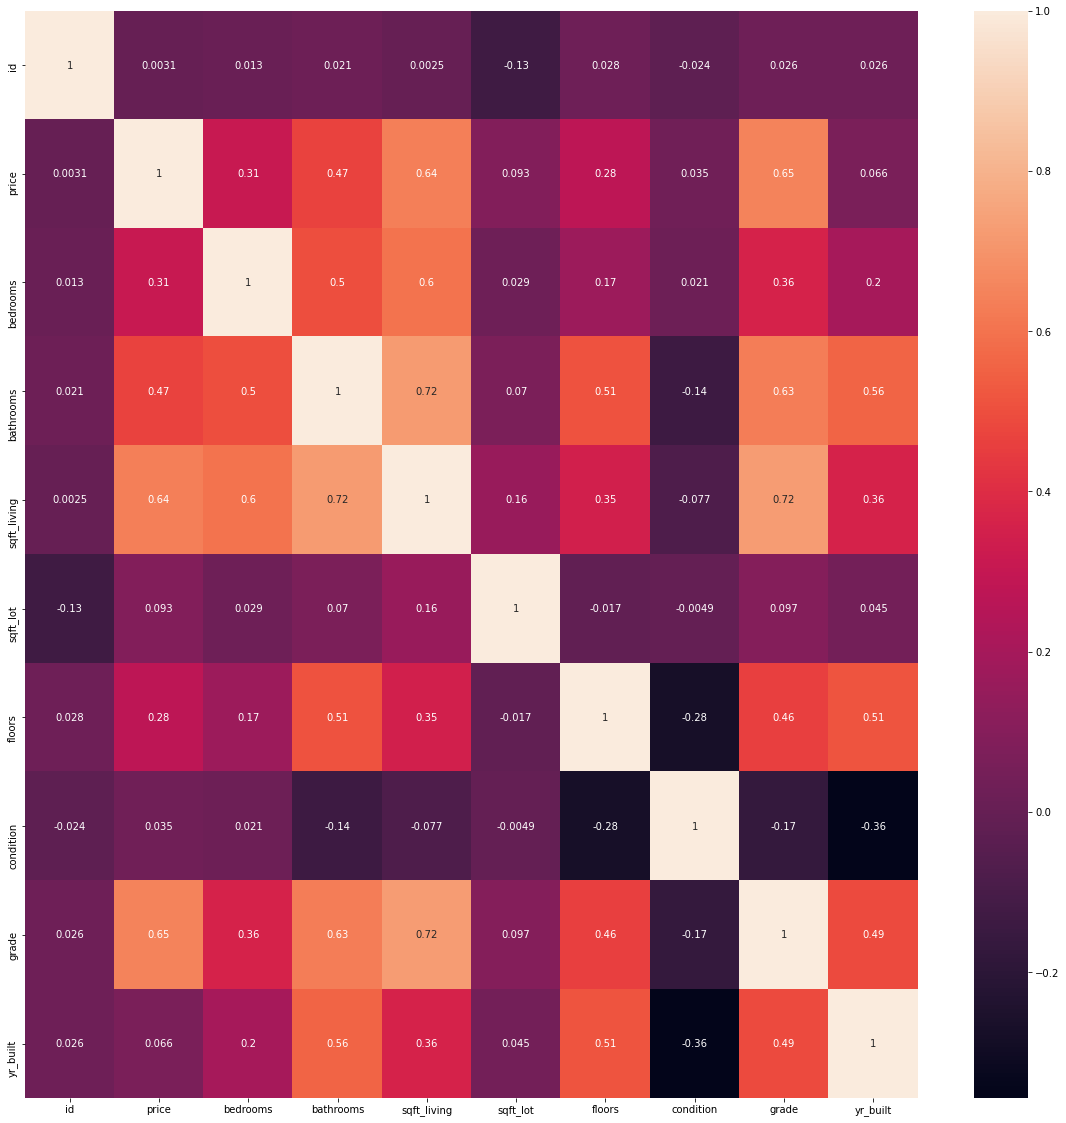

In [76]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(data.corr(), annot=True)
# grade, sqft_living are top correlations with price
# bedroom and bathrooms vs sqft_living = 0.6, 0.72
# sqft_living and grade, bathrooms, bedrooms, and price

In [ ]:
data['bathrooms'].unique()

In [45]:
data['bathrooms_cat'] = 0

<ipython-input-45-69492d07ce99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bathrooms_cat'] = 0


In [46]:
# For each value in data['bathrooms']
for row in data['bathrooms'].index:
    if (data['bathrooms'][row] >=1) and (data['bathrooms'][row] <2):
        data['bathrooms_cat'][row] = '1 plus'
    if (data['bathrooms'][row] >=2) and (data['bathrooms'][row] <3):
        data['bathrooms_cat'][row] = '2 plus'
    if (data['bathrooms'][row] >=3) and (data['bathrooms'][row] <4):
        data['bathrooms_cat'][row] = '3 plus'
    if (data['bathrooms'][row] >=4) and (data['bathrooms'][row] <5):
        data['bathrooms_cat'][row] = '4 plus'
    if (data['bathrooms'][row] >=5) and (data['bathrooms'][row] <6):
        data['bathrooms_cat'][row] = '5 plus'

<ipython-input-46-bf5cb12e091f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bathrooms_cat'][row] = '1 plus'
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1024: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[key] = value
/opt/anaconda3/lib/p

In [47]:
data.groupby(by='bathrooms_cat')['id'].count()

bathrooms_cat
0            76
1 plus     8291
2 plus    10193
3 plus     1735
4 plus      138
5 plus        7
Name: id, dtype: int64

In [48]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,bathrooms_cat
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955,1 plus
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951,2 plus
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933,1 plus
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965,3 plus
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987,2 plus


In [ ]:
# Define our X and y

# neat trick; include all column names in a list except for Balance
X_cols = [c for c in data.columns.to_list() if c not in ['Balance', 'bathrooms_cat']]

X = data[X_cols]
y = data['Balance']